# Pre-loading

In [1]:
# !pip install -U textblob
# !which python

# !python --version
# !python -m textblob.download_corpora
import sys
sys.path.append("/opt/anaconda3/envs/p37env/lib/python3.7/site-packages")
print(sys.path)
import textblob

['/Users/jamie/school/hkust/2021-spring/comp4332/RMBI4310-COMP4332-Project/Project1', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python37.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/jamie/Library/Python/3.7/lib/python/site-packages', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/site-packages', '/Library/Python/3.7/site-packages', '/Library/Python/3.7/site-packages/IPython/extensions', '/Users/jamie/.ipython', '/opt/anaconda3/envs/p37env/lib/python3.7/site-packages']


# install glove 
## In this model, we will load glove.42B.300d.txt

In [2]:
#!wget http://nlp.stanford.edu/data/wordvecs/glove.42B.300d.zip
#!unzip glove.42B.300d.zip

In [5]:
import nltk
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import spacy
import re

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression


import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import tqdm


from keras.datasets import imdb

from string import punctuation

from collections import Counter

from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,SpatialDropout1D, GRU, SimpleRNN,Bidirectional,Input,GlobalAveragePooling1D,GlobalMaxPooling1D,concatenate
from keras.utils import to_categorical
from keras import layers
from keras import Model

from keras.preprocessing.text import Tokenizer
from keras.initializers import Constant

from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import keras

from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

from keras.layers import MaxPool1D, MaxPooling1D, Conv1D

from keras.layers.normalization import BatchNormalization
from gensim.models import Word2Vec

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import itertools
from nltk.corpus import stopwords

from sklearn.decomposition import TruncatedSVD
from textblob import TextBlob

import logging 

logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

from xgboost import XGBClassifier



from sklearn.model_selection import train_test_split
import os

import pandas as pd
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem import PorterStemmer
import string


import time
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import  metrics

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV







nlp = spacy.load('en_core_web_sm')





In [10]:
# load data
def load_data(split_name='train', columns=['text', 'stars']):
    try:
        print(f"select [{', '.join(columns)}] columns from the {split_name} split")
        df = pd.read_csv(f'data_2021_spring/{split_name}.csv')
        df = df.loc[:,columns]
        print("succeed!")
        return df
    except:
        print("Failed, then try to ")
        print(f"select all columns from the {split_name} split")
        df = pd.read_csv(f'data_2021_spring/{split_name}.csv')
        return df
    
# pre-processing data
def nor_ds(dataset):    
    text = [re.sub("[^A-Za-z]+", ' ', str(line)).lower() for line in dataset]
    tokens = []    
    disable_list = [
                    "tagger",
                    "parser",
                    "ner",
                    "entity_linker",
                    "entity_ruler",
                    "textcat",
                    "textcat_multilabel",
                    "lemmatizer",
                    "morphologizer",
                    "sentencizer",                
                   ]
    for doc in nlp.pipe(text, n_process=4, batch_size=2000, disable=disable_list):        
        line_tokens = [token.text  for token in doc if not token.is_stop and len(token.text) > 1 ]
        if len(line_tokens) > 0:
            tokens.append(line_tokens)
        else:
            tokens.append(["neutral"])

    return tokens

def adj_ds(dataset):    
    text = [re.sub("[^A-Za-z]+", ' ', str(line)).lower() for line in dataset]
    tokens = []    
    disable_list = [
                    
                    "ner",
                    "entity_linker",
                    "entity_ruler",
                    "textcat",
                    "textcat_multilabel",
                    "lemmatizer",
                    "morphologizer",
                    "sentencizer",                
                   ]
    for doc in nlp.pipe(text, n_process=4, batch_size=2000, disable=disable_list):        
        line_tokens = [token.text  for token in doc if not token.is_stop and len(token.text) > 1 and token.pos_ in ["ADJ"]]
        if len(line_tokens) > 0:
            tokens.append(line_tokens)
        else:
            tokens.append(["neutral"])

    return tokens

    
#train_df = load_data('train', columns=['text'])
train_df = load_data('train', columns='full')
valid_df = load_data('valid', columns='full')
test_df = load_data('test', columns='full')

select [f, u, l, l] columns from the train split
Failed, then try to 
select all columns from the train split
select [f, u, l, l] columns from the valid split
Failed, then try to 
select all columns from the valid split
select [f, u, l, l] columns from the test split
Failed, then try to 
select all columns from the test split


# Pre-Processing

# Glove 
## Global words vector

# TF-IDF

0       nice to have a diner still around food was goo...
1       tried this a while back got the fried chicken ...
2       i expected more pork selections on menu food v...
3       yummy this place is phenomenal it is pricey bu...
4       the truffle macaroni cheese and potatoes au gr...
                              ...                        
9995    i think most people like this place because of...
9996    thought i would give this location a try from ...
9997    i first tried this place a while ago and ever ...
9998    yummy yummy yummy i got the chicken fried stea...
9999    stars for the beer selection star for the pizz...
Name: clean_text, Length: 10000, dtype: object
Time takes to convert text input into feature vector:  0.04  mins
Time takes to train model and make predictions:  0.02  mins
Accuracy:  0.594
Precision Score :  0.5935
Recall Score :  0.5935


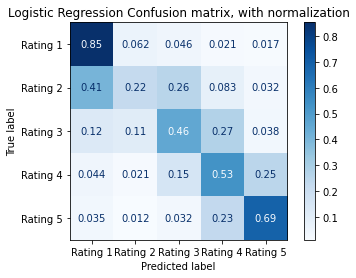

In [11]:



sw = set(stopwords.words("english"))

tfidf=TfidfTransformer()

stop_words = set(stopwords.words('english'))  

def text_prep(text):
    text = text.lower()
    #clean text
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
    #remove non-letters and lower case
    text = re.sub("[^a-z\s]", " ", text)
    
    #remove punctuation        
    #punc_removed = [char for char in text if char not in punct]
    #punc_removed = ''.join(punc_removed)

    word_list  = [word for word in text.split() ]
    return " ".join(word_list)

punct = set(string.punctuation)

start_time = time.time()

train_df["clean_text"] = train_df["text"].map(text_prep)
valid_df["clean_text"] = valid_df["text"].map(text_prep)

print(train_df["clean_text"])


cv= TfidfVectorizer(max_features=2000, min_df = 10, max_df = 0.95)
#cv = CountVectorizer( analyzer = text_prep)
cv.fit(train_df["clean_text"].values)

train_feature_set=cv.transform(train_df["clean_text"].values)
test_feature_set=cv.transform(valid_df["clean_text"].values)

print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

y_train =train_df["stars"]
y_test = valid_df["stars"]

start_time = time.time()
lr = LogisticRegression(penalty='l2', multi_class="multinomial",C=1,solver = 'lbfgs', random_state = 42,max_iter=2000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))

# print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

print("Precision Score : ", metrics.precision_score(y_test, y_pred, 
                                           labels=[1,2,3,4,5],
                                           average='micro'))
print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                            labels=[1,2,3,4,5],
                                           average='micro'))


disp = metrics.plot_confusion_matrix(lr, test_feature_set, y_test,
                                 display_labels=['Rating 1', 'Rating 2', 'Rating 3','Rating 4','Rating 5'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization');

In [12]:


y_train = to_categorical(np.array(train_df["stars"].values)-1)
y_test = to_categorical(np.array(valid_df["stars"].values)-1)


X_train_tfidf = cv.fit_transform(train_df["clean_text"].values)
X_test_tfidf = cv.fit_transform(valid_df["clean_text"].values)

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

data_dim = 100
batch_size = 50
epochs = 5

def tfidf_transform(clean_text, train_len):
    vectorizer = TfidfVectorizer(stop_words = set(stopwords.words('english')))
    vectorizer.fit(clean_text)
    x_train_tfidf_vec = vectorizer.transform(clean_text[:train_len])
    x_test_tfidf_vec = vectorizer.transform(clean_text[train_len:])
    print(x_train_tfidf_vec.shape, x_test_tfidf_vec.shape)
    return x_train_tfidf_vec, x_test_tfidf_vec  



full_text = [i for i in train_df['clean_text']] + [i for i in valid_df['clean_text']] 
full_text = [ x for x in full_text]


x_train_tfidf_vec, x_test_tfidf_vec =  tfidf_transform(full_text, len(train_df["text"]))

train_df['clean_text'] = full_text[:len(train_df["clean_text"])]
valid_df['clean_text'] = full_text[len(train_df["clean_text"]):]

x_helpful_data = np.hstack((np.vstack(train_df["cool"]),np.vstack(train_df["funny"]),np.vstack(train_df["useful"]))) 
y_helpful_data = np.hstack((np.vstack(test_df["cool"]),np.vstack(test_df["funny"]),np.vstack(test_df["useful"])))

(10000, 29350) (2000, 29350)


In [13]:
print(x_train_tfidf_vec.shape)
print(len(train_df["text"]))
print(len(full_text))
print(x_test_tfidf_vec.shape)
print(punct)
print(x_helpful_data.shape)
print(x_helpful_data[:5])

(10000, 29350)
10000
12000
(2000, 29350)
{'+', '&', '`', '[', ')', '.', '?', '#', '(', '/', '{', '-', '>', ',', '=', "'", '~', ';', '@', '_', ']', '\\', '|', '!', '^', '}', '<', '$', '*', '"', ':', '%'}
(10000, 3)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]]


# Training

# Embedding Data

In [14]:



# cv1 = TfidfVectorizer(stop_words = set(stopwords.words('english')), max_features=2000,use_idf=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
# cv2 = TfidfVectorizer(stop_words = set(stopwords.words('english')), max_features=2000,use_idf=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
# cv3 = TfidfVectorizer(stop_words = set(stopwords.words('english')), max_features=2000,use_idf=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
cv1 =  CountVectorizer()
cv2 =  CountVectorizer()
cv3 =  CountVectorizer()

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)

# maxlen = 50

# sequences_train = tokenizer.texts_to_sequences(X_train)
# sequences_train = pad_sequences(sequences_train, maxlen=maxlen)

# sequences_test = tokenizer.texts_to_sequences(X_test)
# sequences_test = pad_sequences(sequences_test, maxlen=maxlen)


svd = TruncatedSVD(n_components = 100)
x_train_tfidf_vec = svd.fit_transform(x_train_tfidf_vec)
x_test_tfidf_vec = svd.fit_transform(x_test_tfidf_vec)


# labels = ["stars","cool","funny","useful"]

# full_stars = to_categorical(np.array(train_df["stars"].values.tolist() + valid_df["stars"].values.tolist())-1)

# x_train_vec, x_val_vec, y_train, y_val = train_test_split(x_train_tfidf_vec, full_stars[:len(train_df["text"])],
#                                                     test_size=0.2,
#                                                     random_state=0)
# x_train_text, x_val_text, _, _ = train_test_split(train_df['clean_text'], full_stars[:len(train_df["text"])],
#                                                     test_size=0.2,
#                                                     random_state=0)




x_train_vec, x_val_vec = x_train_tfidf_vec, x_test_tfidf_vec
x_train_text, x_val_text = train_df['clean_text'], valid_df['clean_text']

cv1.fit(x_train_text)
#cv2.fit(x_val_text)
#cv3.fit(valid_df["clean_text"])



#all_words = set(cv1.vocabulary_.keys()).union(set(cv2.vocabulary_.keys())).union(set(cv3.vocabulary_.keys()))

all_words = set(cv1.vocabulary_.keys())

MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 300
not_exist_words = []
EMBEDDING_FILE = 'glove.42B.300d.txt'
def get_embedding():
    embeddings_index = {}
    f = open(EMBEDDING_FILE)
    for line in f:
        values = line.split()
        word = values[0]
        if len(values) == EMBEDDING_DIM + 1 and word in all_words:
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coefs
        else:
            not_exist_words.append(word)
    f.close()
    return embeddings_index

embeddings_index = get_embedding()
print("Number of words that don't exist in GLOVE:", len(all_words - set(embeddings_index)))


#all_words = set(cv1.vocabulary_.keys()).union(set(cv2.vocabulary_.keys())).union(set(cv3.vocabulary_.keys()))



tokenizer = Tokenizer()

#np_text =  np.append(x_train_text.values,x_val_text.values)

#tokenizer.fit_on_texts(np.append(np_text, valid_df['clean_text'].values))

tokenizer.fit_on_texts(x_train_text.values)


word_index = tokenizer.word_index

nb_words = len(word_index) + 1
embedding_matrix = np.random.rand(nb_words, EMBEDDING_DIM + 2)

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    sent = textblob.TextBlob(word).sentiment
    if embedding_vector is not None:
        embedding_matrix[i] = np.append(embedding_vector, [sent.polarity, sent.subjectivity])
    else:
        embedding_matrix[i, -2:] = [sent.polarity, sent.subjectivity]
        
train_seq = pad_sequences(tokenizer.texts_to_sequences(x_train_text), maxlen=MAX_SEQUENCE_LENGTH)
val_seq = pad_sequences(tokenizer.texts_to_sequences(x_val_text), maxlen=MAX_SEQUENCE_LENGTH)
test_seq = pad_sequences(tokenizer.texts_to_sequences(valid_df['clean_text']), maxlen=MAX_SEQUENCE_LENGTH)



Number of words that don't exist in GLOVE: 1298


In [15]:
print(x_train_text[:5])
print(not_exist_words[:10])

re.sub("[^a-z\s]", " ", "".join(not_exist_words[:10]))

0    nice to have a diner still around food was goo...
1    tried this a while back got the fried chicken ...
2    i expected more pork selections on menu food v...
3    yummy this place is phenomenal it is pricey bu...
4    the truffle macaroni cheese and potatoes au gr...
Name: clean_text, dtype: object
[',', '.', 'a', '"', ':', 'i', ')', '(', '-', "'s"]


'  a  i    s'

# Training Data

In [16]:
print(x_train_vec.shape)
print(x_val_vec.shape)
print(x_test_tfidf_vec.shape)

print(train_seq.shape)
print(val_seq.shape)
print(test_seq.shape)

print(y_train.shape)
      
      
#print(y_val.shape)




tv = TfidfVectorizer(max_features=2000, min_df = 10, max_df = 0.95)
#cv = CountVectorizer( analyzer = text_prep)
tv.fit(train_df["clean_text"].values)

train_feature_set=tv.transform(train_df["clean_text"].values)
test_feature_set=tv.transform(valid_df["clean_text"].values)

print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

y_train =train_df["stars"]
y_test = valid_df["stars"]

start_time = time.time()
lr_model = LogisticRegression(penalty='l2', multi_class="multinomial",C=1,solver = 'lbfgs', random_state = 42,max_iter=2000)
lr_model.fit(train_feature_set,y_train)
lr_model_train_prob = lr_model.predict_proba(train_feature_set)
lr_model_test_prob = lr_model.predict_proba(test_feature_set)


# ac : 6125

def build_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH, ))
    x = Embedding(nb_words, EMBEDDING_DIM + 2, weights=[embedding_matrix],trainable = False)(sequence_input)
    x = SpatialDropout1D(0.2)(x)

    x = Bidirectional(GRU(64,dropout=0.1,recurrent_dropout=0.1,return_sequences=True,
                          recurrent_initializer=tf.keras.initializers.Orthogonal(seed=2),                                                       
))(x)
    x = Conv1D(128, kernel_size = 3, padding = "valid",   
              
              )(x)
    x = MaxPooling1D(pool_size=2) (x)
    x = Conv1D(128, kernel_size = 3, padding = "valid",   
              
              )(x)
    x = MaxPooling1D(pool_size=2) (x)
    x = Bidirectional(GRU(64,dropout=0.1,recurrent_dropout=0.1,
                      recurrent_initializer=tf.keras.initializers.Orthogonal(seed=2),                                                            
        ))(x)
    
    x = BatchNormalization()(x)
    dropout = SpatialDropout1D(0.2)
    dense_input = Input(shape=(100,))
    
    #xgb_input = Input(shape=(100,))
    #adab_input = Input(shape=(100,))
    
    dense_vector = BatchNormalization()(dense_input)
    
#     w2v_input = Input(shape=(MAX_SEQUENCE_LENGTH, ))
#     w2v_emb = Embedding(nb_words, EMBEDDING_DIM + 2, weights=[w2v_embedding_matrix],trainable = True)(w2v_input)
#     w2v_layer = Bidirectional(GRU(64,dropout=0.1,recurrent_dropout=0.1, return_sequences=True))(w2v_emb)
#     w2v_layer = Conv1D(64, kernel_size = 3, padding = "valid",)(w2v_layer)
#     w2v_layer = MaxPooling1D(pool_size=8) (w2v_layer)
#     w2v_layer = Bidirectional(GRU(64,dropout=0.1,recurrent_dropout=0.1,
#                       recurrent_initializer=tf.keras.initializers.Orthogonal(seed=2),                                                            
# ))(w2v_layer)
    
# #                   
#     w2v_layer = BatchNormalization()(w2v_layer)

    helpful_layer = Input(shape=(3,))
    helpful_vector =  BatchNormalization()(helpful_layer)
    
#     bag_input = Input(shape=(31243,))
#     bag_vector = BatchNormalization()(bag_input)
    
    lr_model_layer = Input(shape=(5,))
    lr_model_vector =  BatchNormalization()(lr_model_layer)


    
    feature_vector = concatenate([x, dense_vector, helpful_vector, lr_model_vector])
    feature_vector = layers.Dropout(0.5)(feature_vector)
    feature_vector = BatchNormalization()(feature_vector)
    
    
    
#     layer_emb = concatenate([x, w2v_layer])
#     layer_emb = layers.Dropout(0.5)(layer_emb)
#     layer_emb = BatchNormalization()(layer_emb)
    
#     feature_vector = concatenate([layer_emb, dense_vector])
#     feature_vector = layers.Dropout(0.5)(feature_vector)
#     feature_vector = BatchNormalization()(feature_vector)
    
    
    feature_vector = Dense(64, activation="relu")(feature_vector)
    #feature_vector = BatchNormalization()(feature_vector)
    feature_vector = layers.Dropout(0.5)(feature_vector)
    feature_vector = BatchNormalization()(feature_vector)
    output = Dense(5, activation="softmax")(feature_vector)
   
    
    model = Model(inputs=[sequence_input, dense_input, helpful_layer, lr_model_layer], outputs=output)
    return model





model = build_model()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


class MyThresholdCallback(tf.keras.callbacks.Callback):     
    def __init__(self, patience=5, threshold=62):
        super(MyThresholdCallback, self).__init__()
        self.patience = patience
        self.threshold = threshold
        # best_weights to store the weights at which the minimum loss occurs.
        self.best_weights = None

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best = np.Inf


    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("val_loss")
        val_acc = logs["val_accuracy"]
        
        
        if val_acc >= self.threshold:
            self.model.stop_training = True
                    
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch.")
                self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))

            
callback = EarlyStopping(monitor='val_accuracy', mode="max",baseline=0.025,patience=15)
y_train = to_categorical(np.array(train_df["stars"].values)-1) 
y_val = to_categorical(np.array(valid_df["stars"].values)-1) 
#      train_seq, val_sql for w2v
history = model.fit(  [train_seq, x_train_vec, x_helpful_data, lr_model_train_prob] ,y_train , 
            epochs=30,
                    batch_size=128,
            validation_data=([val_seq, x_val_vec, y_helpful_data,lr_model_test_prob],y_val), 
          verbose=1,
                    shuffle=True,
            callbacks=[ MyThresholdCallback()]              
         )


(10000, 100)
(2000, 100)
(2000, 100)
(10000, 200)
(2000, 200)
(2000, 200)
(10000, 5)
Time takes to convert text input into feature vector:  0.74  mins
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 302)     8190542     input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 200, 302)     0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (No

Epoch 20/30
79/79 [==============================] - 37s 470ms/step - loss: 0.7698 - accuracy: 0.6884 - val_loss: 0.9085 - val_accuracy: 0.6140
Epoch 21/30
79/79 [==============================] - 37s 468ms/step - loss: 0.7580 - accuracy: 0.6872 - val_loss: 0.8804 - val_accuracy: 0.6235
Epoch 00021: early stopping


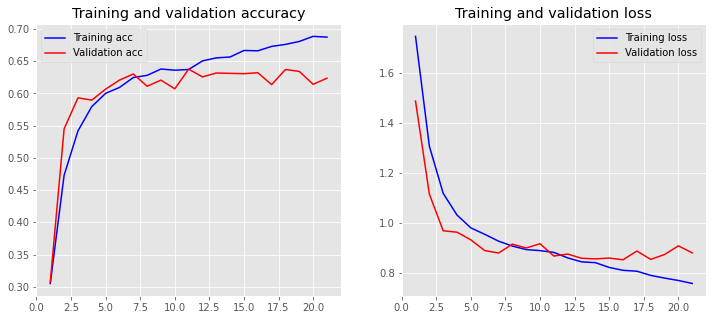

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [18]:
#X_validate = X_test_pad_tmp[-validation_size:]
from sklearn import metrics

#Y_test = np.array(to_categorical(X_["stars"].values))

#X_test = X_test_pad



# tv = TfidfVectorizer(max_features=2000, min_df = 10, max_df = 0.95)
# #cv = CountVectorizer( analyzer = text_prep)
# tv.fit(train_df["clean_text"].values)

# train_feature_set=tv.transform(train_df["clean_text"].values)
# test_feature_set=tv.transform(valid_df["clean_text"].values)

# print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

# y_train =train_df["stars"]
# y_test = valid_df["stars"]

# start_time = time.time()
# lr_model = LogisticRegression(penalty='l2', multi_class="multinomial",C=1,solver = 'lbfgs', random_state = 42,max_iter=2000)
# lr_model.fit(train_feature_set,y_train)
# lr_model_train_prob = lr_model.predict_proba(train_feature_set)
# lr_model_test_prob = lr_model.predict_proba(test_feature_set)


from sklearn.metrics import precision_recall_fscore_support, accuracy_score


score,acc = model.evaluate([val_seq, x_val_vec, y_helpful_data, lr_model_test_prob], y_val, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

y_pred =  model.predict([val_seq, x_val_vec, y_helpful_data, lr_model_test_prob], batch_size=1024, verbose=1)
print(y_test)
y_test = valid_df["stars"]
y_pred = np.argmax(y_pred,axis=1)+1

matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))

# print("F1: ",round(metrics.f1_score(y_test, y_pred),3))
print(classification_report(y_test, y_pred))

print('accuracy', np.mean(y_test == y_pred))

acc = accuracy_score(y_test, y_pred)
print("accuracy score :", acc)



                                             

40/40 [==============================] - 3s 68ms/step - loss: 0.8527 - accuracy: 0.6320
score: 0.85
acc: 0.63
2/2 [==============================] - 1s 280ms/step
0       5
1       3
2       2
3       4
4       1
       ..
1995    1
1996    4
1997    5
1998    3
1999    4
Name: stars, Length: 2000, dtype: int64
[[445  38  27   1   6]
 [109  73  82  12   2]
 [ 28  42 205  61   8]
 [  7   6  86 232  96]
 [  8   1  16 100 309]]
              precision    recall  f1-score   support

           1       0.75      0.86      0.80       517
           2       0.46      0.26      0.33       278
           3       0.49      0.60      0.54       344
           4       0.57      0.54      0.56       427
           5       0.73      0.71      0.72       434

    accuracy                           0.63      2000
   macro avg       0.60      0.59      0.59      2000
weighted avg       0.62      0.63      0.62      2000

accuracy 0.632
accuracy score : 0.632


# Prediction

## output the model prediction for test.csv to pred.csv

In [25]:
import numpy as np


test_df = load_data("test",columns="full")

test_df["clean_text"] = test_df["text"].map(text_prep)

print(test_df["clean_text"])


tv_2000 = TfidfVectorizer(max_features=2000, min_df = 10, max_df = 0.95)
tv_2000.fit(train_df["clean_text"].values)
x_test_feature_set = tv_2000.transform(test_df["clean_text"].values)

tv = TfidfVectorizer(stop_words = set(stopwords.words('english')))
tv.fit(train_df["clean_text"].values)
test_feature_set = tv.transform(test_df["clean_text"].values)


svd = TruncatedSVD(n_components = 100)
test_tfidf_vec = svd.fit_transform(test_feature_set)


test_seq = pad_sequences(tokenizer.texts_to_sequences(test_df['clean_text']), maxlen=MAX_SEQUENCE_LENGTH)



print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

start_time = time.time()
lr_model_test_prob = lr_model.predict_proba(x_test_feature_set)

x_helpful_data = np.hstack((np.vstack(test_df["cool"]),np.vstack(test_df["funny"]),np.vstack(test_df["useful"]))) 



test_preds = model.predict([test_seq, test_tfidf_vec, x_helpful_data, lr_model_test_prob], batch_size=1024, verbose=1)
print(test_preds)

ans = []
labels = np.argmax(test_preds, axis=-1)    
for label in [i for i in labels+1]:
    ans.append(label)
    
    
prediction_ans = pd.DataFrame(data={
    'review_id': test_df['review_id'],
    'stars': ans
})



group_number = 35
prediction_ans.to_csv(f'jamie_pred.csv', index=False)

output_ans = pd.read_csv('jamie_pred.csv')
output_ans.head()

select [f, u, l, l] columns from the test split
Failed, then try to 
select all columns from the test split
0       i took the up train to union station to catch ...
1       we worked with fitness with a twist for part o...
2       it your typical average run of the mill conven...
3       we went to outback today to celebrate my daugh...
4       we went to see nashville unplugged a country c...
                              ...                        
1995    this was an ok burger joint this chain is big ...
1996    came here on a whim as we were passing through...
1997    this is my favorite mexican food place on the ...
1998    stopped in here on around pm when the giants c...
1999    who knew that you could get really good asian ...
Name: clean_text, Length: 2000, dtype: object
Time takes to convert text input into feature vector:  0.48  mins
2/2 [==============================] - 1s 265ms/step
[[6.61039129e-02 1.99739754e-01 5.76864541e-01 1.33210570e-01
  2.40811892e-02]
 [3.75573

,review_id,stars
0,b8-ELBwhmDKcmcM8icT86g,3
1,rBpAJhIen_V-zLoXZIcROg,5
2,_pALaDG6se9OTkGGhyhnNA,3
3,ru8fpA1Uk0tTFtO5hLM49g,1
4,fRPgwuFoY6SriToXZyaOQA,2


# model diagram 

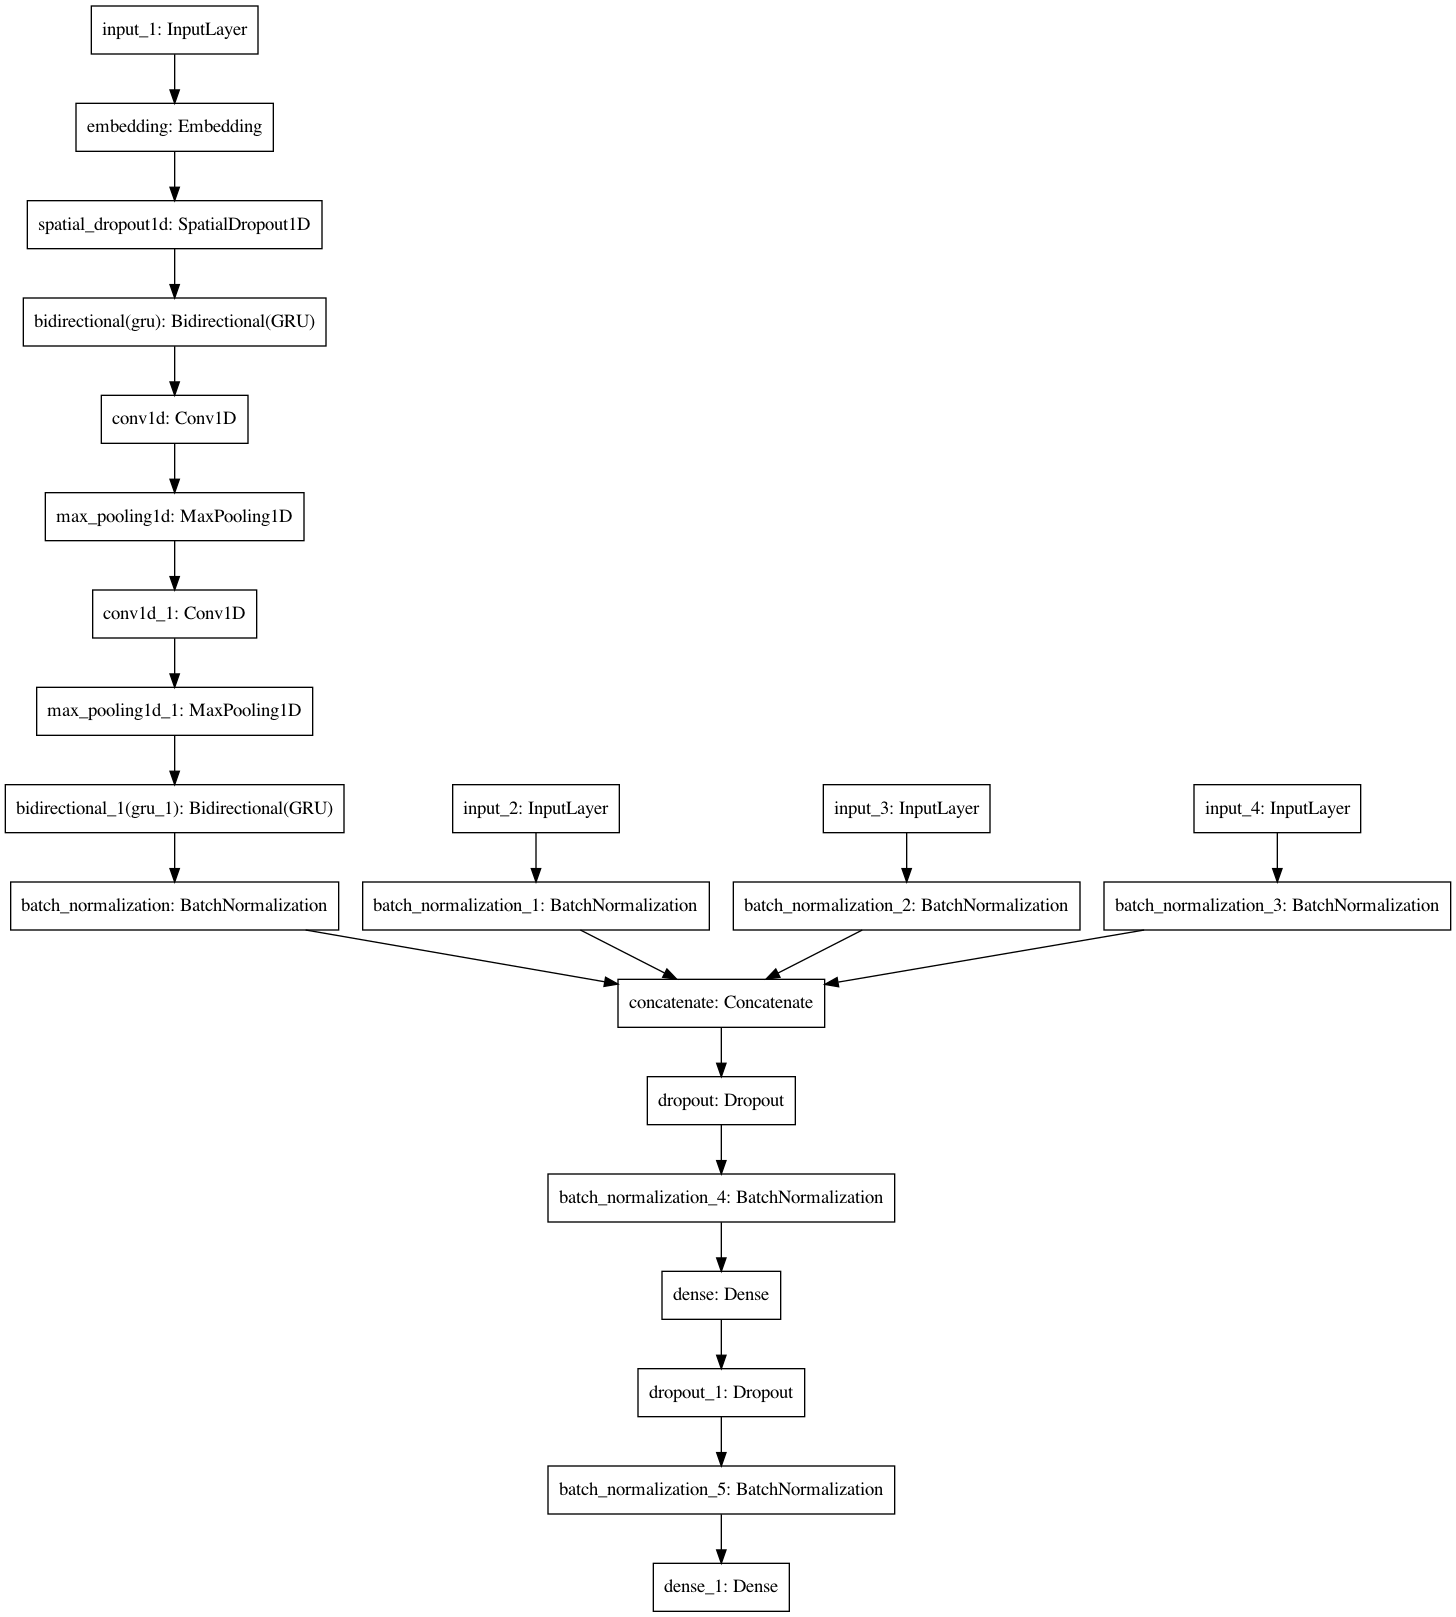

In [26]:
#!pip install pydot
#!pip install pydotplus

%reload_ext autoreload
%reload_ext autoreload
%reload_ext autoreload

dot_img_file = 'ensemble_model_diagram.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=False)